/tmp/ipykernel_41249/753990278.py:11: DtypeWarning: Columns (12,13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/processed/ocorrencias_tratadas.csv')


### Primeiras Linhas do DataFrame ###
  ATENDIMENTO_BAIRRO_NOME                            EQUIPAMENTO_URBANO_NOME  \
0           Sítio Cercado                                                NaN   
1                  Centro                                                NaN   
2                  Centro                                                NaN   
3           Jardim Social                                                NaN   
4                 Uberaba  CENTRO MUNICIPAL DE EDUCAÇÃO INFANTIL ANA PROV...   

  FLAG_EQUIPAMENTO_URBANO FLAG_FLAGRANTE                     LOGRADOURO_NOME  \
0                       f            NÃO                       Rua Paissandu   
1                       f            NÃO                   Praça Rui Barbosa   
2                       f            NÃO                   Praça Rui Barbosa   
3                       f            NÃO            Avenida Edgard Stellfeld   
4                       t            NÃO  Rua Cabo Cornélio de Souza Martins   



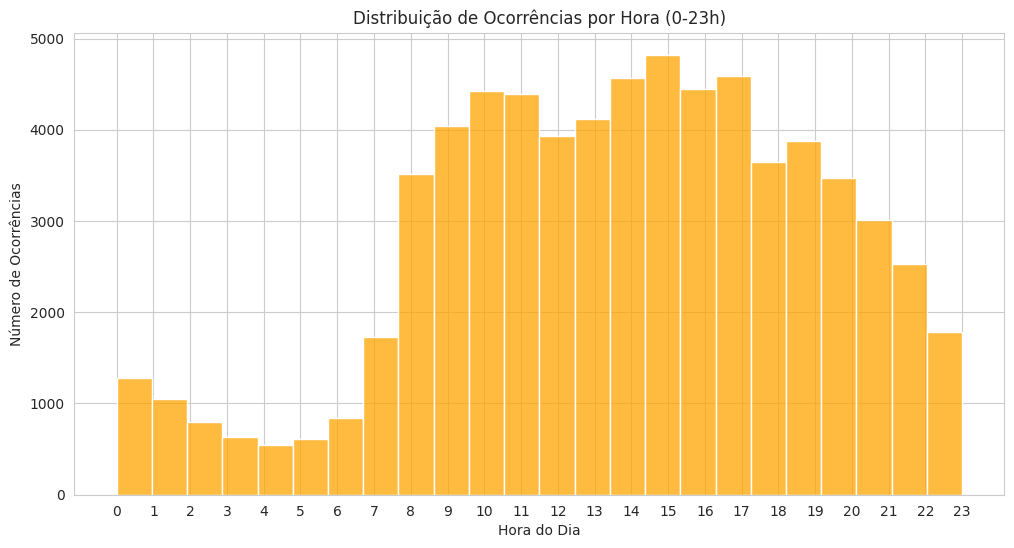

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Adicionando seaborn para visualizações mais ricas

# Configurações de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Carregar dados tratados
# Verifique se o caminho '../../data/processed/ocorrencias_tratadas.csv' está correto
df = pd.read_csv('../../data/processed/ocorrencias_tratadas.csv')

print("### Primeiras Linhas do DataFrame ###")
print(df.head())
print("\n" + "="*50 + "\n")


# ----------------------------------------------------------------------
# 1. Crimes por Ano (Tendência de Longo Prazo)
# ----------------------------------------------------------------------
print("### 1. Ocorrências por Ano ###")
if 'ano' in df.columns and 'tipo_crime' in df.columns:
    df.groupby('ano')['tipo_crime'].count().plot(kind='bar', title='Total de Ocorrências por Ano', color='darkblue')
    plt.xlabel('Ano')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("⚠️ Colunas 'ano' ou 'tipo_crime' não encontradas. Verifique o script coleta.py.")


# ----------------------------------------------------------------------
# 2. Crimes por Bairro (Top 10 Foco Geográfico)
# ----------------------------------------------------------------------
print("### 2. Top 10 Bairros com Mais Ocorrências ###")
if 'bairro' in df.columns:
    df['bairro'].value_counts().head(10).plot(kind='bar', title='Top 10 Bairros com Mais Ocorrências', color='darkred')
    plt.xlabel('Bairro')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Coluna 'bairro' não encontrada. Verifique o script coleta.py.")


# --- ANÁLISES ADICIONAIS PARA O PORTFÓLIO ---

# ----------------------------------------------------------------------
# 3. Crimes por Mês (Tendência Sazonal)
# ----------------------------------------------------------------------
print("### 3. Ocorrências por Mês (Sazonalidade) ###")
if 'mes' in df.columns and 'tipo_crime' in df.columns:
    # Agrupa por mês e conta o número de ocorrências
    monthly_data = df.groupby('mes')['tipo_crime'].count()
    
    # Mapeia números para nomes de meses para melhor visualização
    meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
    
    # Plota a tendência
    monthly_data.plot(kind='line', title='Tendência Mensal das Ocorrências', marker='o', color='green')
    plt.xticks(monthly_data.index, meses) # Define os nomes dos meses no eixo X
    plt.xlabel('Mês')
    plt.ylabel('Número de Ocorrências')
    plt.show()


# ----------------------------------------------------------------------
# 4. Top 5 Tipos de Crime
# ----------------------------------------------------------------------
print("### 4. Distribuição dos Principais Tipos de Crime ###")
if 'tipo_crime' in df.columns:
    top_crimes = df['tipo_crime'].value_counts().head(5)
    
    # Plota o gráfico de barras
    top_crimes.plot(kind='barh', title='Top 5 Naturezas de Ocorrência', color='purple')
    plt.gca().invert_yaxis() # Coloca o maior no topo
    plt.xlabel('Número de Ocorrências')
    plt.ylabel('Natureza do Crime')
    plt.tight_layout()
    plt.show()


# ----------------------------------------------------------------------
# 5. Distribuição Horária (Pico de Ocorrências)
# ----------------------------------------------------------------------
# Assumindo que a coluna 'OCORRENCIA_HORA' (ou similar) foi mantida/mapeada no coleta.py
# Se a hora estiver em formato 'HH:MM:SS', precisamos extrair apenas a hora.
print("### 5. Distribuição de Ocorrências por Hora do Dia ###")

# Tenta criar uma coluna 'hora' limpa
try:
    if 'OCORRENCIA_HORA' in df.columns:
        # Extrai a hora como número inteiro (HH)
        df['hora'] = pd.to_datetime(df['OCORRENCIA_HORA'], format='%H:%M:%S', errors='coerce').dt.hour
    
        # Plota a distribuição
        sns.histplot(df['hora'].dropna(), bins=24, kde=False, color='orange')
        plt.title('Distribuição de Ocorrências por Hora (0-23h)')
        plt.xlabel('Hora do Dia')
        plt.ylabel('Número de Ocorrências')
        plt.xticks(range(0, 24))
        plt.show()
    else:
        print("⚠️ Coluna 'OCORRENCIA_HORA' não encontrada para análise horária.")

except Exception as e:
    print(f"⚠️ Erro ao processar a coluna de hora: {e}")

In [6]:
# ----------------------------------------------------------------------
# 6. Mapa de Calor: Tipo de Crime vs. Dia da Semana
# ----------------------------------------------------------------------
print("### 6. Mapa de Calor: Tipo de Crime por Dia da Semana ###")

if 'tipo_crime' in df.columns and 'OCORRENCIA_DIA_SEMANA' in df.columns:
    # Selecionar os 5 tipos de crime mais comuns para manter a visualização limpa
    top_5_crimes = df['tipo_crime'].value_counts().head(5).index.tolist()
    df_top_crimes = df[df['tipo_crime'].isin(top_5_crimes)]
    
    # Criar a tabela dinâmica (pivot table) para o heatmap
    crime_weekday = df_top_crimes.pivot_table(
        index='tipo_crime', 
        columns='OCORRENCIA_DIA_SEMANA', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Ordem correta dos dias da semana (em Português)
    dias_ordem = ['DOMINGO', 'SEGUNDA-FEIRA', 'TERÇA-FEIRA', 'QUARTA-FEIRA', 'QUINTA-FEIRA', 'SEXTA-FEIRA', 'SÁBADO']
    
    # Reordenar as colunas
    crime_weekday = crime_weekday.reindex(columns=dias_ordem, fill_value=0)
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        crime_weekday, 
        cmap="Reds", 
        annot=True, 
        fmt="d", 
        linewidths=.5, 
        cbar_kws={'label': 'Total de Ocorrências'}
    )
    plt.title('Concentração dos Top 5 Crimes por Dia da Semana')
    plt.ylabel('Tipo de Crime')
    plt.xlabel('Dia da Semana')
    plt.yticks(rotation=0)
    plt.show()
else:
    print("⚠️ Colunas 'tipo_crime' ou 'OCORRENCIA_DIA_SEMANA' não encontradas.")

### 6. Mapa de Calor: Tipo de Crime por Dia da Semana ###
⚠️ Colunas 'tipo_crime' ou 'OCORRENCIA_DIA_SEMANA' não encontradas.


In [7]:
# ----------------------------------------------------------------------
# 9. Tabela Gráfica: Top 10 Bairros
# ----------------------------------------------------------------------
print("### 9. Top 10 Bairros com Ocorrências (Tabela Analítica) ###")

if 'bairro' in df.columns:
    # 1. Calcular a contagem e o percentual
    total_ocorrencias = len(df)
    
    # Contagem de ocorrências por bairro
    contagem_bairro = df['bairro'].value_counts()
    
    # Criar DataFrame para a tabela
    df_top_10 = pd.DataFrame(contagem_bairro.head(10))
    df_top_10.columns = ['Total de Ocorrências']
    
    # Calcular o percentual
    df_top_10['% do Total'] = (df_top_10['Total de Ocorrências'] / total_ocorrencias) * 100
    
    # 2. Formatar e exibir a tabela
    # Aplicar formatação de número inteiro e percentual com duas casas decimais
    df_top_10_formatado = df_top_10.style.format({
        'Total de Ocorrências': '{:,.0f}',
        '% do Total': '{:.2f} %'
    }).set_caption("Top 10 Bairros Mais Afetados")
    
    # Exibir o DataFrame formatado (no Jupyter, ele renderiza como tabela HTML)
    display(df_top_10_formatado)

    # Nota: Lembre-se de importar 'display' se não tiver feito antes. Se der erro, 
    # adicione 'from IPython.display import display' no topo do notebook.
else:
    print("⚠️ Coluna 'bairro' não encontrada. Impossível gerar a tabela analítica.")

### 9. Top 10 Bairros com Ocorrências (Tabela Analítica) ###
⚠️ Coluna 'bairro' não encontrada. Impossível gerar a tabela analítica.
